# 0. Load libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
from matplotlib import pyplot as plt
from utils.func_utils import cross_tabulation_analysis, fill_unknown
%matplotlib inline

In [2]:
df_raw = pd.read_csv('data/bank-additional-full.csv', delimiter=";")

In [3]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    df_raw[col] = df_raw[col].astype('category')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [6]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df_raw.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# 1a Correlation Heatmap

In [8]:
df_raw.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

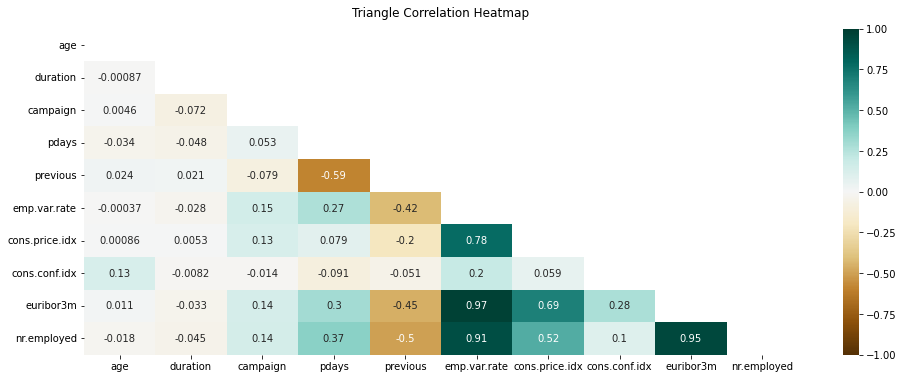

In [9]:
# Plot the heatmap, we only need half of the matrix since it is symmetric. And the correlation of a variable itself is 1.
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_raw.corr(), dtype=bool))
heatmap = sns.heatmap(df_raw.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Features Correlating with emp.var.rate')

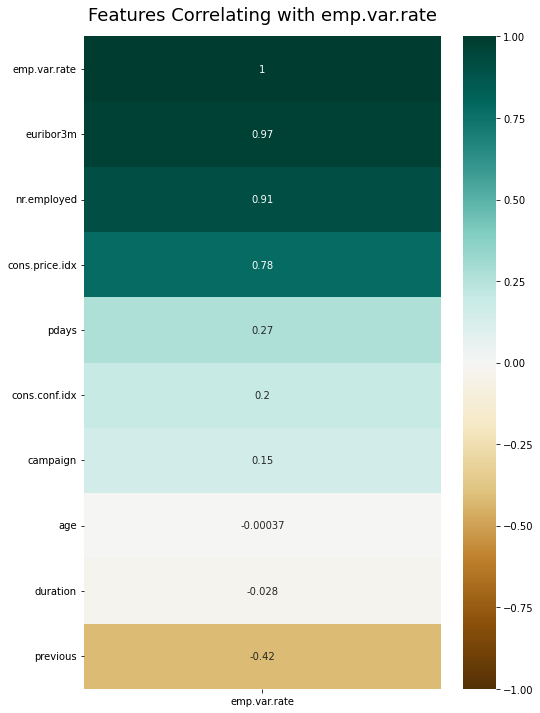

In [10]:
# In case we want to see the sorted correlation for 1 specific variable
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_raw.corr()[['emp.var.rate']].sort_values(by='emp.var.rate', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with emp.var.rate', fontdict={'fontsize':18}, pad=16)

# 1b Missing(unknown) Value

In [11]:
mask = np.column_stack([df_raw[col].astype(str).str.contains(r"unknown", na=False) for col in df_raw])
df_unknown = df_raw.loc[mask.any(axis=1)]

In [12]:
df_unknown

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


## There are 10700 rows with unknown value
## Let's look at which columns have the unknown value and how many are there

In [13]:
for col in df_unknown:
    print(col, df_unknown[col].value_counts()['unknown'] if 'unknown' in df_unknown[col].value_counts() else 0)

age 0
job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


### So, **job, marital, education, default, housing and loan** column has unknown values. All catagoriacal, no numerical.
### Let's do the simplest imputation here first: by replacing the unknown value with the most frequent category in the column
## Update: We now use the new dataset after imputation after clustering here!

In [14]:
df = pd.read_csv('data/cleaned_data_by_clustering_fill.csv', delimiter=",")
df.drop(['Component1', 'Component2', 'Component3', 'Component4', 'k-means cluster'], axis=1, inplace=True)
# df = df_raw.copy()

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,admin.,single,high.school,no,yes,no,telephone,dec,mon,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no
1,39,housemaid,married,basic.4y,no,yes,no,telephone,dec,wed,...,1,999,1,failure,-0.2,92.756,-45.9,3.743,5176.3,no
2,41,technician,divorced,professional.course,no,no,yes,cellular,dec,thu,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.669,5176.3,no
3,37,admin.,married,high.school,no,yes,no,telephone,dec,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no
4,48,admin.,married,high.school,no,yes,yes,telephone,dec,fri,...,1,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no


0    admin.
Name: job, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']


<AxesSubplot:>

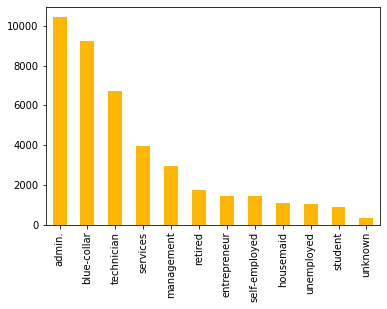

In [16]:
print(df_raw['job'].mode())
df_raw['job'].value_counts().plot.bar(color="#fcb603")
# in the newly copied dataframe, we replace "unknown" with "admin"
# df['job'].replace({"unknown":"admin."}, inplace=True)


0    married
Name: marital, dtype: category
Categories (4, object): ['divorced', 'married', 'single', 'unknown']


<AxesSubplot:>

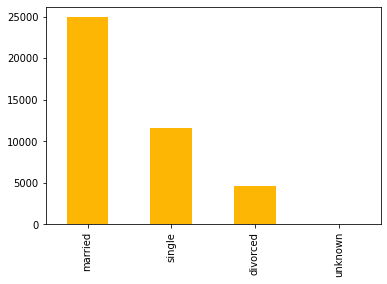

In [17]:
print(df_raw['marital'].mode())
df_raw['marital'].value_counts().plot.bar(color="#fcb603")
# df['marital'].replace({"unknown":"married"}, inplace=True)

0    university.degree
Name: education, dtype: category
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


<AxesSubplot:>

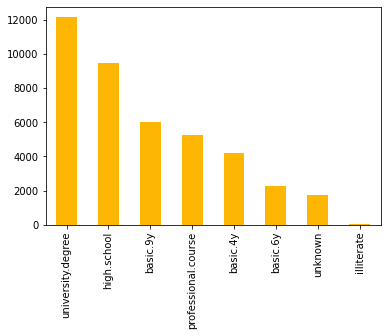

In [18]:
print(df_raw['education'].mode())
df_raw['education'].value_counts().plot.bar(color="#fcb603")
# df['education'].replace({"unknown":"university.degree"}, inplace=True)

0    no
Name: default, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']


<AxesSubplot:>

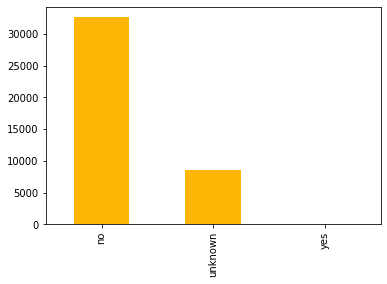

In [19]:
print(df_raw['default'].mode())
df_raw['default'].value_counts().plot.bar(color="#fcb603")
# df['default'].replace({"unknown":"no"}, inplace=True)

0    yes
Name: housing, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']


<AxesSubplot:>

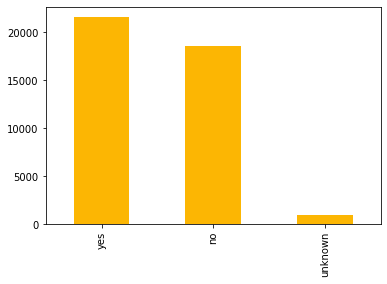

In [20]:
print(df_raw['housing'].mode())
df_raw['housing'].value_counts().plot.bar(color="#fcb603")
# df['housing'].replace({"unknown":"yes"}, inplace=True)

0    no
Name: loan, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']


<AxesSubplot:>

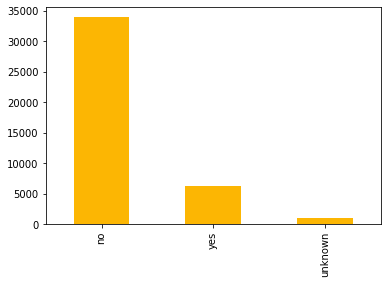

In [21]:
print(df_raw['loan'].mode())
df_raw['loan'].value_counts().plot.bar(color="#fcb603")
# df['loan'].replace({"unknown":"no"}, inplace=True)

## Now, df is the cleaned dataset with all unknown being replaced
## And we can use better methods if time allowed (eg. iterative regression imputation)
http://www.stat.columbia.edu/~gelman/arm/missing.pdf    page 11
## Another way to improve this in my mind is to do clustering first. Then we still impute the missing value with the one with max frequency but within each group.

In [22]:
df.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# 1c Cross-tabulation analysis

                  y      
y                no   yes
job                      
admin.         9363  1389
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
                 Chi-square test   results
0  Pearson Chi-square ( 10.0) =   960.2507
1                     p-value =     0.0000
2                  Cramer's V =     0.1527


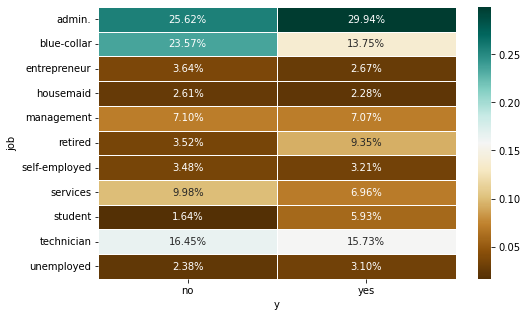

In [23]:
cross_tabulation_analysis(df, "job", "y")

              y      
y            no   yes
marital              
divorced   4136   476
married   22464  2544
single     9948  1620
                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   120.7843
1                    p-value =     0.0000
2                 Cramer's V =     0.0542


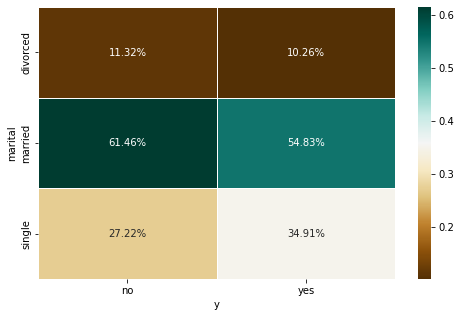

In [24]:
cross_tabulation_analysis(df, "marital", "y")

                         y      
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    11978  1921
                Chi-square test   results
0  Pearson Chi-square ( 6.0) =   192.1936
1                    p-value =     0.0000
2                 Cramer's V =     0.0683


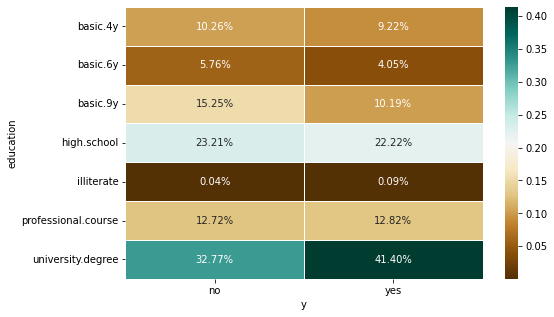

In [25]:
cross_tabulation_analysis(df, "education", "y")

             y      
y           no   yes
default             
no       36545  4640
yes          3     0
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.3809
1                    p-value =    0.5371
2               Cramer's phi =    0.0030


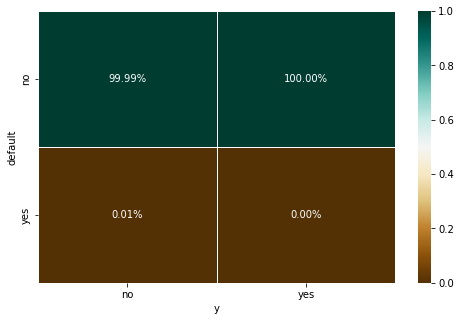

In [26]:
cross_tabulation_analysis(df, "default", "y")

             y      
y           no   yes
housing             
no       16596  2026
yes      19952  2614
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    5.0612
1                    p-value =    0.0245
2               Cramer's phi =    0.0111


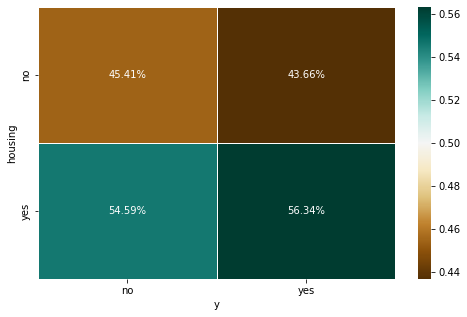

In [27]:
cross_tabulation_analysis(df, "housing", "y")

          y      
y        no   yes
loan             
no    30983  3957
yes    5565   683
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.8215
1                    p-value =    0.3647
2               Cramer's phi =    0.0045


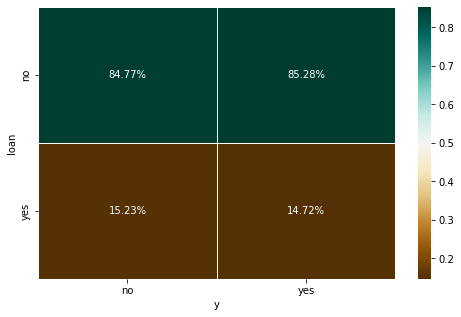

In [28]:
cross_tabulation_analysis(df, "loan", "y")

               y      
y             no   yes
contact               
cellular   22291  3853
telephone  14257   787
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   863.2691
1                    p-value =     0.0000
2               Cramer's phi =     0.1448


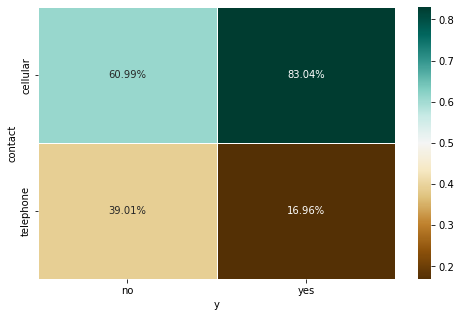

In [29]:
cross_tabulation_analysis(df, "contact", "y")

           y     
y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256
                Chi-square test    results
0  Pearson Chi-square ( 9.0) =   3101.1494
1                    p-value =      0.0000
2                 Cramer's V =      0.2744


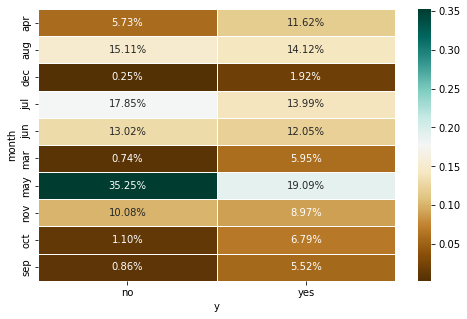

In [30]:
cross_tabulation_analysis(df, "month", "y")

                y      
y              no   yes
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949
                Chi-square test  results
0  Pearson Chi-square ( 4.0) =   26.1449
1                    p-value =    0.0000
2                 Cramer's V =    0.0252


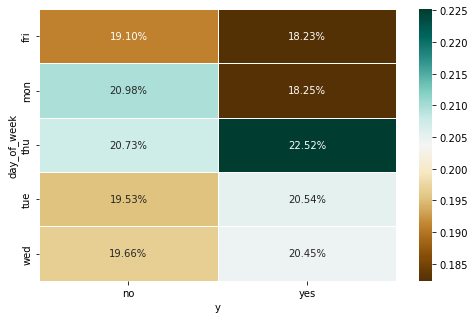

In [31]:
cross_tabulation_analysis(df, "day_of_week", "y")

                 y      
y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894
                Chi-square test    results
0  Pearson Chi-square ( 2.0) =   4230.5238
1                    p-value =      0.0000
2                 Cramer's V =      0.3205


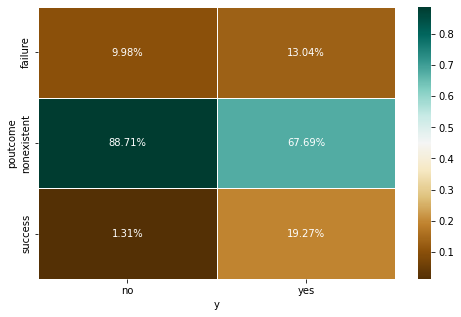

In [32]:
cross_tabulation_analysis(df, "poutcome", "y")

                  y      
y                no   yes
emp.var.rate             
-3.4            617   454
-3.0             84    88
-2.9           1069   594
-1.8           7723  1461
-1.7            370   403
-1.1            334   301
-0.2              9     1
-0.1           3451   232
 1.1           7523   240
 1.4          15368   866
                Chi-square test    results
0  Pearson Chi-square ( 9.0) =   5806.7073
1                    p-value =      0.0000
2                 Cramer's V =      0.3755


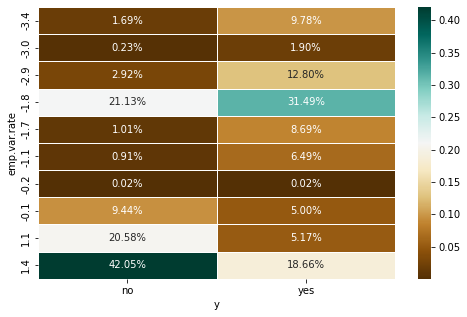

                   y     
y                 no  yes
cons.price.idx           
92.201           506  264
92.379           161  106
92.431           267  180
92.469           112   66
92.649           189  168
92.713            84   88
92.756             9    1
92.843           156  126
92.893          5270  524
92.963           451  264
93.075          2016  442
93.200          3426  190
93.369           114  150
93.444          4904  271
93.749            77   97
93.798            25   42
93.876            90  122
93.918          6278  407
93.994          7523  240
94.027           113  120
94.055           122  107
94.199           153  150
94.215           135  176
94.465          4186  188
94.601           111   93
94.767            70   58
                 Chi-square test    results
0  Pearson Chi-square ( 25.0) =   7665.7348
1                     p-value =      0.0000
2                  Cramer's V =      0.4314


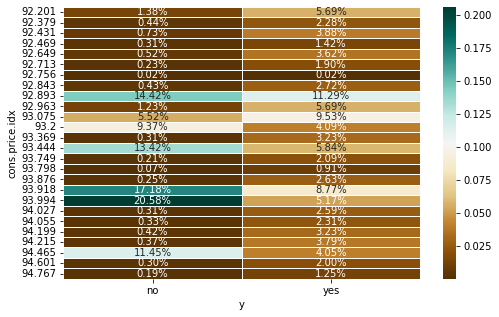

                  y     
y                no  yes
cons.conf.idx           
-50.8            70   58
-50.0           156  126
-49.5           111   93
-47.1          2016  442
-46.2          5270  524
-45.9             9    1
-42.7          6278  407
-42.0          3426  190
-41.8          4186  188
-40.8           451  264
-40.4            25   42
-40.3           135  176
-40.0            90  122
-39.8           122  107
-38.3           113  120
-37.5           153  150
-36.4          7523  240
-36.1          4904  271
-34.8           114  150
-34.6            77   97
-33.6           112   66
-33.0            84   88
-31.4           506  264
-30.1           189  168
-29.8           161  106
-26.9           267  180
                 Chi-square test    results
0  Pearson Chi-square ( 25.0) =   7665.7348
1                     p-value =      0.0000
2                  Cramer's V =      0.4314


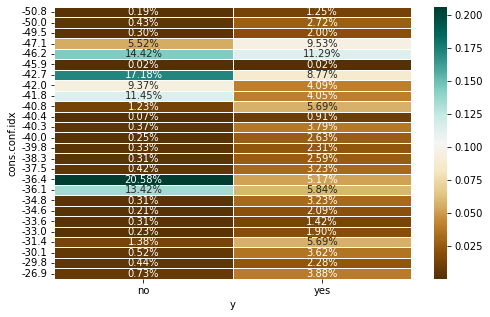

             y    
y           no yes
euribor3m         
0.634        2   6
0.635       21  22
0.636       11   3
0.637        1   5
0.638        2   5
...        ...  ..
4.967      610  33
4.968      935  57
4.970      168   4
5.000        4   3
5.045        4   5

[316 rows x 2 columns]
                  Chi-square test    results
0  Pearson Chi-square ( 315.0) =   9026.3968
1                      p-value =      0.0000
2                   Cramer's V =      0.4681


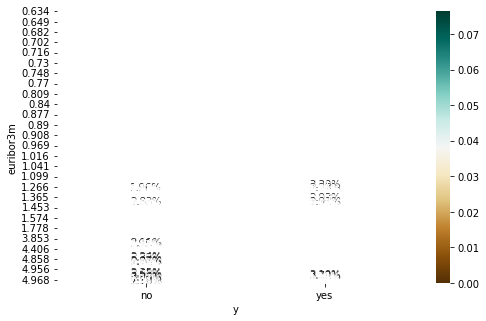

                 y      
y               no   yes
nr.employed             
4963.6         334   301
4991.6         370   403
5008.7         281   369
5017.5         617   454
5023.5          84    88
5076.2        1069   594
5099.1        7442  1092
5176.3           9     1
5191.0        7523   240
5195.8        3451   232
5228.1       15368   866
                 Chi-square test    results
0  Pearson Chi-square ( 10.0) =   6975.0578
1                     p-value =      0.0000
2                  Cramer's V =      0.4115


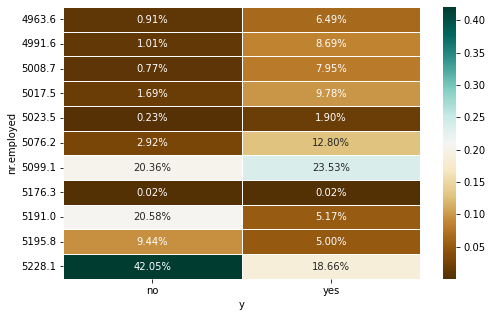

In [33]:
for var in ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]:
    cross_tabulation_analysis(df, var, "y")

## Job, Marital, Education, Housing, Contact, month, day-of-week and poutcome seem to influence the target variable with p < 0.05

# 1d EDA Summary
#### Group1 seem to be the most useful variables by now. But we only looked into categorical datas and haven't do any analysis on the numeric datas so far. 
#### TODO: Was the campaign successful? I am not sure how to do this... Maybe compare the ratio of outcomes in this campaign vs. the previous one? Then it is an unsuccessful one (See below, 11.3% vs. 24.4%).

In [34]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [35]:
df["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [36]:
print(4640 / (4640 + 36548), 1373 / (1373 + 4252))

0.11265417111780131 0.24408888888888888


In [37]:
df.to_csv("./data/cleaned_data.csv", sep=",", index=False)

# 2 Improved unknown value handling
#### Clustering fisrt, then assign the most frequent value

## 2.1 Data processing and standalization

In [38]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
# drop out all catagorical 
df_new = df_raw.drop(['duration', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis=1)
# df_new = df_raw.drop(['duration', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)


In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [42]:
df_new.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [43]:
# The data is not on the same scale, standarlize first
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df_new)
scaled_data[0]


array([ 1.53303429, -0.56592197,  0.1954139 , -0.34949428,  0.64809227,
        0.72272247,  0.88644656,  0.71245988,  0.33167991])

## 2.2 Apply PCA to do dimension reduction

In [44]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [45]:
pca.explained_variance_ratio_

array([0.43262262, 0.15072846, 0.11973066, 0.10840813, 0.09429445,
       0.0473256 , 0.04294602, 0.00276561, 0.00117844])

Text(0, 0.5, 'Cumulative Explained Variance')

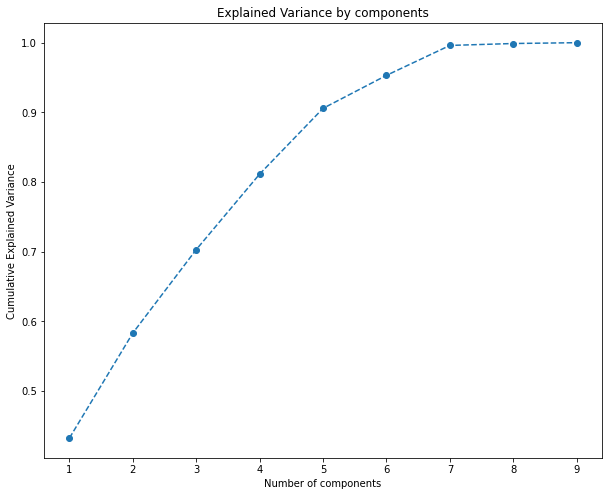

In [46]:
# how many features need to keep
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# plt.plot(range(1, 5), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")

## So we keep 4 components to preserve 80% of the variance

In [47]:
pca = PCA(n_components=4)
# pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [48]:
pca_data[0]

array([-1.26917737,  0.88451017, -1.48679009, -0.03685898])

## 2.3 K-means clustering
#### Use elbow methods to decide the number of clusters

In [49]:
from tqdm import tqdm
wcss = []
for i in tqdm(range(1, 15)):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_data)
    wcss.append(kmeans_pca.inertia_)

100%|██████████| 14/14 [00:02<00:00,  4.68it/s]


Text(0, 0.5, 'WCSS')

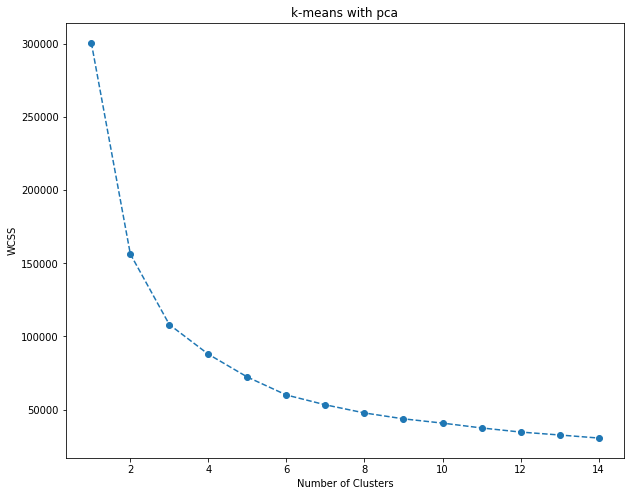

In [50]:
# kmeans elbow methods
plt.figure(figsize = (10, 8))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title("k-means with pca")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

## The kink comes at 3 clusters

In [51]:
# Let's finally implement it
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
# kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=3, random_state=42)

In [52]:
# concat the result back to the raw df
df_pca_kmeans = pd.concat([df_raw.reset_index(drop=True), pd.DataFrame(pca_data)], axis=1)
df_pca_kmeans.columns.values[-4:] = ["Component1", "Component2", "Component3", "Component4"]
# df_pca_kmeans.columns.values[-3:] = ["Component1", "Component2", "Component3"]
df_pca_kmeans["k-means cluster"] = kmeans_pca.labels_

In [53]:
df_pca_kmeans.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Component1,Component2,Component3,Component4,k-means cluster
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,1.806778,-0.175653,-0.801034,1.279806,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,1.802679,-0.837159,0.868967,0.160889,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,1.768109,-0.590343,0.359141,0.896088,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,1.802375,-0.886160,0.992671,0.078006,0
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,2.352837,0.817836,-0.080128,1.914668,0


/Users/Lin/opt/anaconda3/envs/2022datathon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


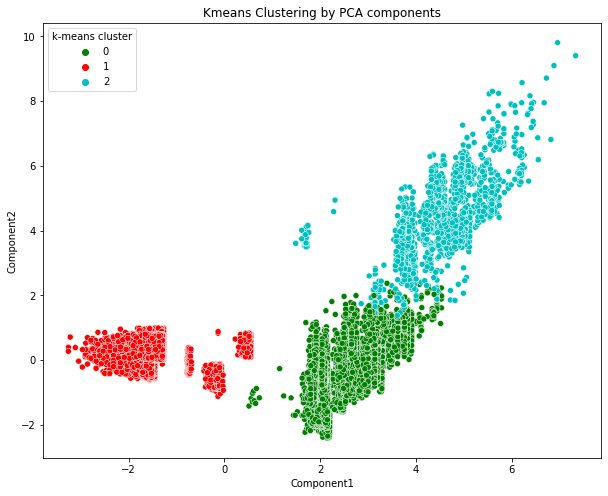

In [54]:
x_axis = df_pca_kmeans["Component1"]
y_axis = df_pca_kmeans["Component2"]
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans["k-means cluster"], palette=["g", "r", "c"])
# sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans["k-means cluster"], palette=["g", "r", "c", "m"])
plt.title("Kmeans Clustering by PCA components")
plt.show()


In [55]:
print(type(df_raw['loan'].mode().name))

<class 'str'>


### split the dataframe, deal with each dataframe, then concat the result

In [56]:
df_0 = df_pca_kmeans[df_pca_kmeans["k-means cluster"]==0]
df_1 = df_pca_kmeans[df_pca_kmeans["k-means cluster"]==1]
df_2 = df_pca_kmeans[df_pca_kmeans["k-means cluster"]==2]
df_lst = [df_0, df_1, df_2]

In [57]:
cleand_df_list = []
cols = ["job", "marital", "education", "default", "housing", "loan"]
for df in df_lst:
    # fill_unknown(df, cols)
    df_cleaned = fill_unknown(df, cols)
    cleand_df_list.append(df_cleaned)

In [58]:
df_lst[0]["education"].value_counts()

university.degree      3584
high.school            2951
basic.9y               1779
professional.course    1380
basic.4y               1093
basic.6y                638
unknown                 475
illiterate                5
Name: education, dtype: int64

In [59]:
cleand_df_list[0]["education"].value_counts()

university.degree      4059
high.school            2951
basic.9y               1779
professional.course    1380
basic.4y               1093
basic.6y                638
illiterate                5
Name: education, dtype: int64

In [60]:
df_cleaned_pca_kmeans = pd.concat(cleand_df_list, axis=0)

In [61]:
df_cleaned_pca_kmeans.nunique()

age                   78
job                   11
marital                3
education              7
default                2
housing                2
loan                   2
contact                2
month                 10
day_of_week            5
duration            1544
campaign              42
pdays                 27
previous               8
poutcome               3
emp.var.rate          10
cons.price.idx        26
cons.conf.idx         26
euribor3m            316
nr.employed           11
y                      2
Component1         16315
Component2         16314
Component3         16316
Component4         16316
k-means cluster        3
dtype: int64

In [62]:
df_cleaned_pca_kmeans.to_csv("data/cleaned_data_by_clustering_fill.csv", index=False, sep=",")

In [66]:
def get_age_group(row):
    if row['age'] <= 19:
        return "teenage"
    elif row['age'] <= 39:
        return "adult"
    elif row['age'] <= 59:
        return "middle age adult"
    else:
        return "senior"

In [67]:
df['age_group'] = df.apply(lambda row: get_age_group(row), axis=1)

/var/folders/m3/4yh806w92fdgcn0bk16ql7nw0000gn/T/ipykernel_1700/458309577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = df.apply(lambda row: get_age_group(row), axis=1)


In [68]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,Component1,Component2,Component3,Component4,k-means cluster,age_group
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,-42.0,4.286,5195.8,no,1.682696,3.658840,1.762131,-0.914448,2,adult
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,-42.0,4.191,5195.8,no,1.713669,3.927029,1.084237,-0.455215,2,middle age adult
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,-42.0,4.191,5195.8,no,1.712758,3.780028,1.455348,-0.703863,2,middle age adult
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,-42.0,4.191,5195.8,no,1.715189,3.979401,0.961881,-0.372609,2,middle age adult
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,-42.0,4.191,5195.8,no,1.675759,3.634840,1.935152,-0.631726,2,adult


                  contact          
contact          cellular telephone
age_group                          
adult                 810        66
middle age adult      448        35
senior                239        17
teenage                20         3
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    1.3258
1                    p-value =    0.7230
2                 Cramer's V =    0.0285


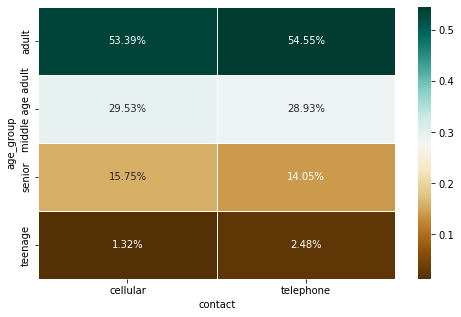

In [69]:
cross_tabulation_analysis(df, "age_group", "contact")


In [ ]:
# Criteria 1 Conversion rate 1: (y=yes) / (number of clients being reached out)
# Criteria 2 Conversion rate 2: (y=yes) / (different poutcomes)
# Criteria 3 Conversion rate 3: (y=yes) / (The hard-to-convince clients)
# Criteria 4 Return on investment: (Revenue generated vs. cost)
# Criteria 5 Revenue per call vs. cost per call
# Criteria 6 Total Customer lifetime value vs. cost of this campaign

In [91]:
df = pd.read_csv('data/cleaned_data_by_clustering_fill.csv', delimiter=",")
df.drop(['Component1', 'Component2', 'Component3', 'Component4', 'k-means cluster'], axis=1, inplace=True)

In [92]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [93]:
df_poutcome_success = df[df['poutcome'] == "success"]
df_poutcome_failure = df[df['poutcome'] == "failure"]
df_poutcome_nonexistent = df[df['poutcome'] == "nonexistent"]

In [94]:
df_poutcome_success["y"].value_counts()

yes    894
no     479
Name: y, dtype: int64

In [95]:
df_poutcome_failure["y"].value_counts()

no     3647
yes     605
Name: y, dtype: int64

In [96]:
df_poutcome_nonexistent["y"].value_counts()

no     32422
yes     3141
Name: y, dtype: int64

In [97]:
df_poutcome_failure_hard = df_poutcome_failure[df_poutcome_failure['previous'] > 2]
df_poutcome_nonexistent_hard = df_poutcome_nonexistent[df_poutcome_nonexistent['previous'] > 2]


In [98]:
df_poutcome_failure_hard["y"].value_counts()

no     80
yes    42
Name: y, dtype: int64

In [100]:
df_poutcome_nonexistent_hard["y"].value_counts()

Series([], Name: y, dtype: int64)